# Vorhersage des Überlebens der Titanic
Dieses Notebook bietet eine grundlegende Einführung in maschinelles Lernen anhand des Titanic-Datensatzes. Wir werden die Daten laden, eine explorative Datenanalyse durchführen, die Daten vorverarbeiten und schließlich ein einfaches maschinelles Lernmodell trainieren, um das Überleben auf der Titanic vorherzusagen.

## 1. Installing Libraries
Wir beginnen mit dem Installieren der erforderlichen Python-Bibliotheken.
Sie können folgende Befehl kopieren:



1.  pip install pandas
2.  pip install matplotlib
3.  pip install seaborn
4.  pip install scikit-learn

In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## 2. Laden der Daten
Wir laden sowohl die Trainings- als auch die Testdaten mithilfe von Pandas aus CSV-Dateien.

In [260]:
# Load the datasets
train_df = pd.read_csv('Data/train.csv')
test_df = pd.read_csv('Data/test.csv')

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Data Analysis
Bevor wir ein Modell erstellen, untersuchen wir den Datensatz, um seine Struktur zu verstehen. Wir betrachten alle Merkmal, die für unsere Prädiktion sinnvoll/relevant sein können sind. Welche sind sinvoll ? welche nicht ? Nenne sie jeweils 2 

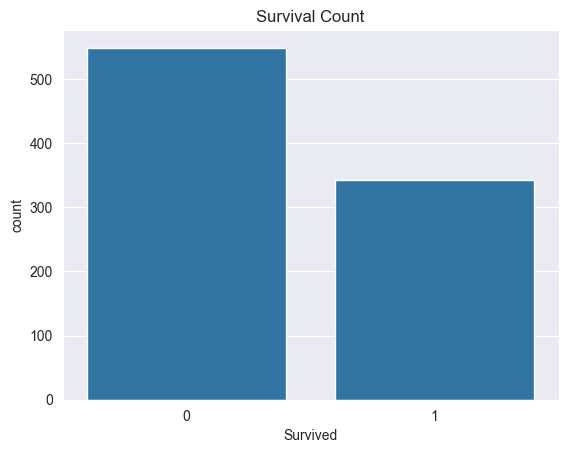

In [261]:
# Visualize survival counts
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Count')
plt.show()

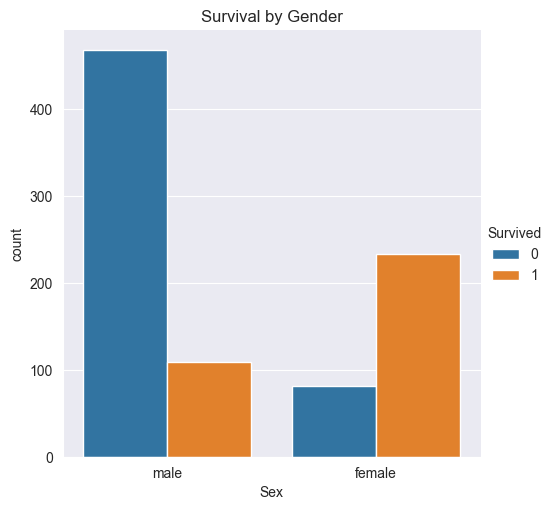

In [262]:
# Visualize survival by gender
sns.catplot(x='Sex', hue='Survived', kind='count', data=train_df)
plt.title('Survival by Gender')
plt.show()

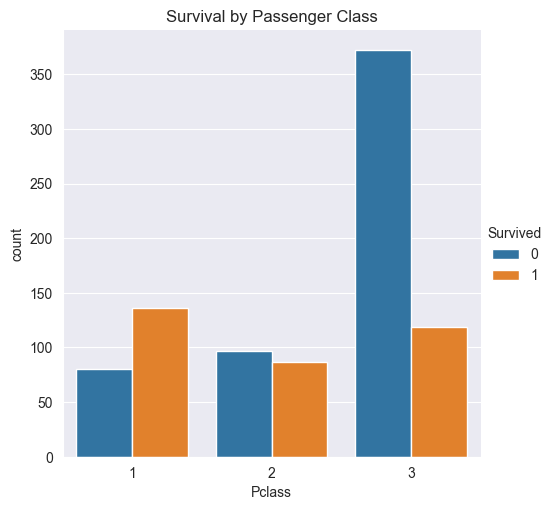

In [263]:
# Visualize survival by passenger class
sns.catplot(x='Pclass', hue='Survived', kind='count', data=train_df)
plt.title('Survival by Passenger Class')
plt.show()

## 4. Vorverarbeitung der Daten
Was passiert hier:
Die Spalte „Geschlecht“ im Datensatz ist ursprünglich kategorisch mit zwei möglichen Werten: „männlich“ und „weiblich“.
Maschinelle Lernmodelle arbeiten im Allgemeinen mit numerischen Daten statt mit Zeichenfolgen oder Kategorien.
Die Funktion .map() wird verwendet, um diese kategorischen Werte in numerische Werte umzuwandeln:
„männlich“ wird auf 1 abgebildet.
„weiblich“ wird auf 0 abgebildet.
Warum wir das tun:
Durch die Umwandlung kategorialer Werte in ein numerisches Format kann das maschinelle Lernmodell die Daten verarbeiten. In diesem Fall ist eine binäre Transformation (1 für männlich, 0 für weiblich) angemessen, da es nur zwei Kategorien für das Geschlecht gibt.

In [264]:
# Convert 'Sex' to numeric (1 = male, 0 = female)
train_df['Sex'] = train_df['Sex'].map({'male': 1, 'female': 0})
test_df['Sex'] = test_df['Sex'].map({'male': 1, 'female': 0})

# One-hot encode 'Embarked' and 'Pclass'
train_df = pd.get_dummies(train_df, columns=['Embarked', 'Pclass'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Embarked', 'Pclass'], drop_first=True)



One-Hot-Encoding ist eine Technik, die kategorische Variablen in mehrere binäre Spalten umwandelt:
Für jede eindeutige Kategorie wird eine neue Spalte mit 1 erstellt, wenn der Passagier zu dieser Kategorie gehört, und 0, wenn nicht.
Wenn ein Passagier beispielsweise von „C“ (Cherbourg) aus eingeschifft ist, ist die Spalte „Embarked_C“ 1, während „Embarked_Q“ und „Embarked_S“ 0 sind.
## 5. Trainieren des Modells
Wir werden jetzt einen Random-Forest-Klassifikator erstellen, um das Überleben vorherzusagen.
Wir entfernen die Spalten 'Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin' aus den Tainingsdaten, die momentan nicht relevant sind


In [265]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [266]:
# Drop unnecessary columns from train and test datasets
X = train_df.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'])
y = train_df['Survived']

test_features = test_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Drop rows with missing values in the training data
X_train_cleaned = X_train.dropna()
y_train_cleaned = y_train.loc[X_train_cleaned.index]  # Ensure y_train matches the cleaned X_train

# Drop rows with missing values in the validation data
X_val_cleaned = X_val.dropna()
y_val_cleaned = y_val.loc[X_val_cleaned.index]

## 6.Train-test split

Beim maschinellen Lernen ist es wichtig zu bewerten, wie gut ein Modell mit Daten funktioniert, die es noch nicht gesehen hat. Dazu teilen wir den Datensatz in zwei Teile auf:

80 % Trainingsdaten: Dieser Teil der Daten wird zum Trainieren des Modells verwendet. Das Modell lernt Muster und Beziehungen aus diesen Daten.

20 % Validierungsdaten: Dieser kleinere Teil wird separat gehalten, um die Leistung des Modells nach dem Training zu testen. Dies gibt uns eine Vorstellung davon, wie gut das Modell auf unbekannte Daten verallgemeinert werden kann.

In [267]:
# This specifies that 20% of the data should be used as the validation set, and 80% should be used as the training set.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

##  7.Train the Model
Wir benutzen dafür die bereits gegebene Methoden von sklearn. Wichtige Methoden:
1. #### fit(x, y) : x: training samples, y: Array of target values
      Trainiert/baut das Random-Forest-Modell unter Verwendung der Eingabeproben X und der zugehörigen Labels y
2. #### predict(x): x: training samples
     Die Prädiktion
        
3. #### score(x,y): x: Test samples, y: True labels for the test samples.
   Bewertet die Leistung des Modells durch Berechnung der mittleren Genauigkeit bei den Testdaten (x) und den true labels (y)
   
Bei genauere Beschreibeung: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.fit
       


In [268]:
# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# train a KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_model.fit(X_train_cleaned, y_train_cleaned)

KNeighborsClassifier()

## 8. Eine Prädiktion  treffen

In [269]:
# Make predictions on the validation set
y_pred = model.predict(X_val)

y_pred_knn = knn_model.predict(X_val_cleaned)


## 9. Bewerten des Modells anhand der Validierungsdaten

In [270]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.2f}')

# Evaluate the model
accuracy_knn = accuracy_score(y_val_cleaned, y_pred_knn)
print(f'KNN Validation Accuracy: {accuracy_knn:.2f}')

Validation Accuracy: 0.82
KNN Validation Accuracy: 0.67


Warum ist diese Evaluation nicht ganz aussagekräftig sein könnte, wenn wir die methode "accuracy_score" benutzten   ?
---> wenn man nur nullen prädizieret wurde man auf undgefähr 80% accurcy kommen

## 10. Pridäktion auf Testdaten
Nun testen wir das model mit unseren unbekannten Testdaten. Dafür speichern wir die Ergebnisse als csv-Datei unter "titanic_submission.csv"

In [271]:
test_predictions = model.predict(test_features)

# Prepare the submission file
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_predictions
})

# Save the submission file
submission.to_csv('titanic_submission.csv', index=False)


## 11. Schlussfolgerung
In diesem Notebook haben wir den Prozess des Datenladens, der Erkundung, der Vorverarbeitung und des Modelltrainings anhand des Titanic-Datensatzes durchlaufen. Wir haben einen Random-Forest-Klassifikator zur Vorhersage der Überlebensrate trainiert, und Sie können dieses Modell weiter verbessern, indem Sie mit anderen Algorithmen, Feature-Engineering und Hyperparameter-Abstimmung experimentieren.

## 12. Mögliche bessere Evaluation (AUC-ROC):
Die ROC-Kurve (Receiver Operating Characteristic) ist ein Diagramm, das veranschaulicht, wie gut ein Klassifizierungsmodell zwischen zwei Klassen unterscheidet. Es stellt die wahre Positivenrate (True Positive Rate, TPR) gegen die Falsch-Positivenrate (False Positive Rate, FPR) dar. Diese Evaluationsmethode bietet eine genauere Einschätzung der Modellleistung und hilft zu erkennen, ob das Modell zufällige Vorhersagen trifft oder tatsächlich sinnvoll zwischen den Klassen unterscheidet

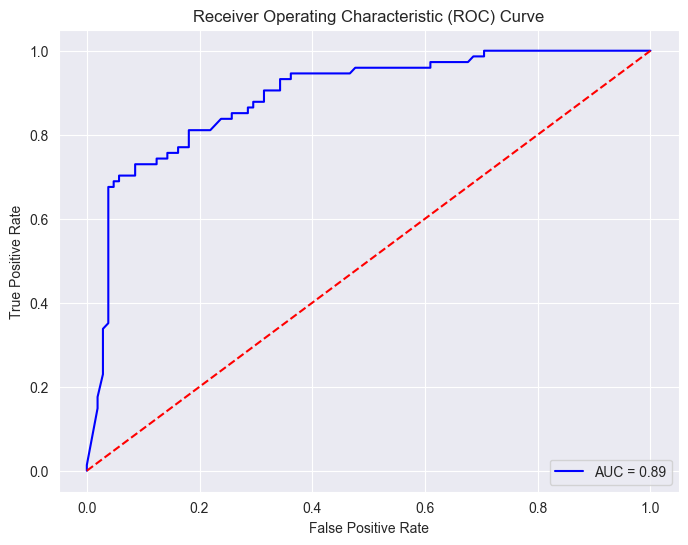

In [272]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get the predicted probabilities for the validation set
y_val_probs = model.predict_proba(X_val)[:, 1]  # Probability estimates for the positive class (survived)

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_val, y_val_probs)
auc_score = roc_auc_score(y_val, y_val_probs)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line (random guess)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Der AUC-Wert gibt an, wie gut das Modell zwischen den Klassen unterscheidet (in diesem Fall überlebt oder nicht überlebt).
 Ein perfekter Klassifikator hat einen AUC von 1, während ein zufälliger Klassifikator einen AUC von 0,5 hat.

Quellen:
